## Dogs vs Cats

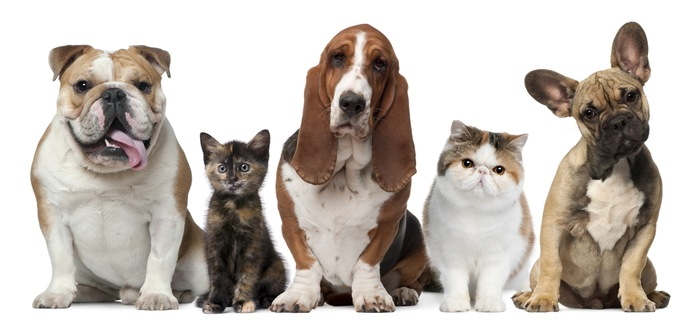

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
import random
import seaborn as sns
import os
import zipfile
from PIL import Image
import PIL
import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = r"C:\Users\Ofir\Desktop\קבצים ךפרוייקט\train"
titles = os.listdir(url)

#### the first step is to upload the pictures from the files and turn them to pixels.

In [3]:
pixels =[]
for title in titles:
    file = os.path.join(url,title)
    img = Image.open(file)
    resize = img.resize((50,50))
    bw = resize.convert(mode ='L')
    pixels.append([bw.getdata()])
    bw.save(r"C:\\Users\\Ofir\\Desktop\\קבצים ךפרוייקט\\reshape_data_B&W\\" + title)
    

#### the second step is to create the category column  

In [4]:
categories=[]
for title in titles:
    
    title=title.split('.')[0]
    if title=='dog':
        categories.append(1) # dog = 1
    else:
        categories.append(0) # cat = 0

In [ ]:
#### the third step is to build the data frame

In [5]:
df_train = pd.DataFrame({
    'filename':titles,
    'category':categories,
     'pixels': pixels
})

In [6]:
df_train.head()

,filename,category,pixels
0,cat.0.jpg,0,"[(171, 179, 186, 193, 197, 201, 205, 208, 211,..."
1,cat.1.jpg,0,"[(41, 48, 42, 46, 48, 48, 40, 42, 39, 44, 64, ..."
2,cat.10.jpg,0,"[(42, 49, 55, 58, 57, 56, 55, 53, 49, 48, 47, ..."
3,cat.100.jpg,0,"[(222, 224, 231, 230, 227, 228, 229, 228, 227,..."
4,cat.1000.jpg,0,"[(107, 101, 86, 120, 147, 157, 205, 224, 188, ..."


#### the type of pixsels' column is object so we need to turn it to int

In [7]:
df_train.dtypes

filename    object
category     int64
pixels      object
dtype: object

In [8]:
split_df = pd.DataFrame(df_train['pixels'].tolist())
split_df

,0
0,"(171, 179, 186, 193, 197, 201, 205, 208, 211, ..."
1,"(41, 48, 42, 46, 48, 48, 40, 42, 39, 44, 64, 6..."
2,"(42, 49, 55, 58, 57, 56, 55, 53, 49, 48, 47, 4..."
3,"(222, 224, 231, 230, 227, 228, 229, 228, 227, ..."
4,"(107, 101, 86, 120, 147, 157, 205, 224, 188, 2..."
...,...
24995,"(141, 144, 147, 148, 149, 151, 152, 153, 155, ..."
24996,"(90, 89, 99, 95, 88, 76, 77, 90, 91, 97, 97, 1..."
24997,"(43, 50, 55, 51, 41, 45, 52, 48, 102, 111, 112..."
24998,"(251, 239, 206, 145, 100, 89, 87, 93, 82, 81, ..."


In [9]:
split_df = pd.DataFrame(df_train['pixels'].tolist())

df = pd.concat([df_train, split_df], axis=1)
df = df.drop('pixels', axis=1)

df

,filename,category,0
0,cat.0.jpg,0,"(171, 179, 186, 193, 197, 201, 205, 208, 211, ..."
1,cat.1.jpg,0,"(41, 48, 42, 46, 48, 48, 40, 42, 39, 44, 64, 6..."
2,cat.10.jpg,0,"(42, 49, 55, 58, 57, 56, 55, 53, 49, 48, 47, 4..."
3,cat.100.jpg,0,"(222, 224, 231, 230, 227, 228, 229, 228, 227, ..."
4,cat.1000.jpg,0,"(107, 101, 86, 120, 147, 157, 205, 224, 188, 2..."
...,...,...,...
24995,dog.9995.jpg,1,"(141, 144, 147, 148, 149, 151, 152, 153, 155, ..."
24996,dog.9996.jpg,1,"(90, 89, 99, 95, 88, 76, 77, 90, 91, 97, 97, 1..."
24997,dog.9997.jpg,1,"(43, 50, 55, 51, 41, 45, 52, 48, 102, 111, 112..."
24998,dog.9998.jpg,1,"(251, 239, 206, 145, 100, 89, 87, 93, 82, 81, ..."


In [10]:
for i in range(0,25000):
    df[0][i]= list(df[0][i])   

In [11]:
df

,filename,category,0
0,cat.0.jpg,0,"[171, 179, 186, 193, 197, 201, 205, 208, 211, ..."
1,cat.1.jpg,0,"[41, 48, 42, 46, 48, 48, 40, 42, 39, 44, 64, 6..."
2,cat.10.jpg,0,"[42, 49, 55, 58, 57, 56, 55, 53, 49, 48, 47, 4..."
3,cat.100.jpg,0,"[222, 224, 231, 230, 227, 228, 229, 228, 227, ..."
4,cat.1000.jpg,0,"[107, 101, 86, 120, 147, 157, 205, 224, 188, 2..."
...,...,...,...
24995,dog.9995.jpg,1,"[141, 144, 147, 148, 149, 151, 152, 153, 155, ..."
24996,dog.9996.jpg,1,"[90, 89, 99, 95, 88, 76, 77, 90, 91, 97, 97, 1..."
24997,dog.9997.jpg,1,"[43, 50, 55, 51, 41, 45, 52, 48, 102, 111, 112..."
24998,dog.9998.jpg,1,"[251, 239, 206, 145, 100, 89, 87, 93, 82, 81, ..."


In [12]:
df.dtypes

filename    object
category     int64
0           object
dtype: object

In [15]:
split_df2 = pd.DataFrame(df[0].tolist())

df_new = pd.concat([df, split_df2], axis=1)
df_new = df_new.drop(0, axis=1)

df_new

,filename,category,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,cat.0.jpg,0,179,186,193,197,201,205,208,211,...,18,19,14,9,4,4,3,2,2,2
1,cat.1.jpg,0,48,42,46,48,48,40,42,39,...,52,54,59,59,49,53,56,59,58,40
2,cat.10.jpg,0,49,55,58,57,56,55,53,49,...,76,74,73,73,107,147,148,143,164,164
3,cat.100.jpg,0,224,231,230,227,228,229,228,227,...,249,244,240,232,227,215,203,211,219,212
4,cat.1000.jpg,0,101,86,120,147,157,205,224,188,...,95,99,93,95,97,86,82,101,93,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,dog.9995.jpg,1,144,147,148,149,151,152,153,155,...,160,162,163,163,164,164,166,167,168,169
24996,dog.9996.jpg,1,89,99,95,88,76,77,90,91,...,45,63,70,82,90,93,89,80,90,83
24997,dog.9997.jpg,1,50,55,51,41,45,52,48,102,...,157,167,106,142,136,133,117,138,136,146
24998,dog.9998.jpg,1,239,206,145,100,89,87,93,82,...,116,101,93,97,101,104,105,106,111,116


In [16]:
df_new = df_new.drop('filename',axis=1)
df_new

,category,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,179,186,193,197,201,205,208,211,216,...,18,19,14,9,4,4,3,2,2,2
1,0,48,42,46,48,48,40,42,39,44,...,52,54,59,59,49,53,56,59,58,40
2,0,49,55,58,57,56,55,53,49,48,...,76,74,73,73,107,147,148,143,164,164
3,0,224,231,230,227,228,229,228,227,225,...,249,244,240,232,227,215,203,211,219,212
4,0,101,86,120,147,157,205,224,188,236,...,95,99,93,95,97,86,82,101,93,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,144,147,148,149,151,152,153,155,158,...,160,162,163,163,164,164,166,167,168,169
24996,1,89,99,95,88,76,77,90,91,97,...,45,63,70,82,90,93,89,80,90,83
24997,1,50,55,51,41,45,52,48,102,111,...,157,167,106,142,136,133,117,138,136,146
24998,1,239,206,145,100,89,87,93,82,81,...,116,101,93,97,101,104,105,106,111,116


### now the dataset is ready and we can build models

## Models

In [17]:
X = df_new.drop(['category'],axis=1)
y = df_new['category']

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6418666666666667


In [ ]:
## לקחת את המודל הכי טוב ולשים אותו עם הטסט המקורי

### Hard voting

In [22]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()


voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)

acc = accuracy_score(y_test, preds)

print("Accuracy is: " + str(acc))

Accuracy is: 0.6092


### Bagging

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score
from numpy import mean

bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6056